/tmp/ipykernel_1223714/2537466304.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = read_csv('Beras RF.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)
/home/fnilvu/Downloads/Braincore Engineering/ARIMA-Beras/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fnilvu/Downloads/Braincore Engineering/ARIMA-Beras/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fnilvu/Downloads/Braincore Engineering/ARIMA-Beras/ven

                               SARIMAX Results                                
Dep. Variable:                  Beras   No. Observations:                  733
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3982.936
Date:                Tue, 16 Apr 2024   AIC                           7977.873
Time:                        13:13:05   BIC                           8005.447
Sample:                             0   HQIC                          7988.510
                                - 733                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3382      0.009    -38.661      0.000      -0.355      -0.321
ar.L2         -0.0229      0.018     -1.254      0.210      -0.059       0.013
ar.L3          0.0999      0.031      3.254      0.0

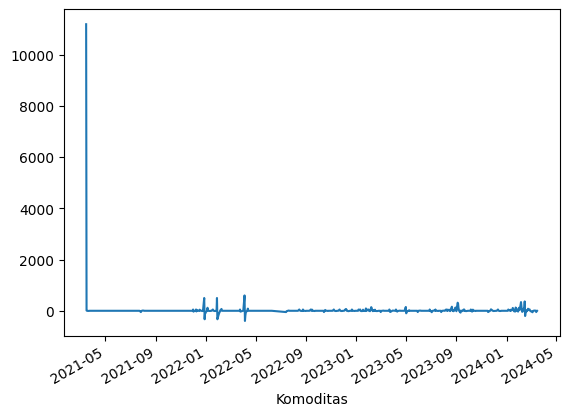

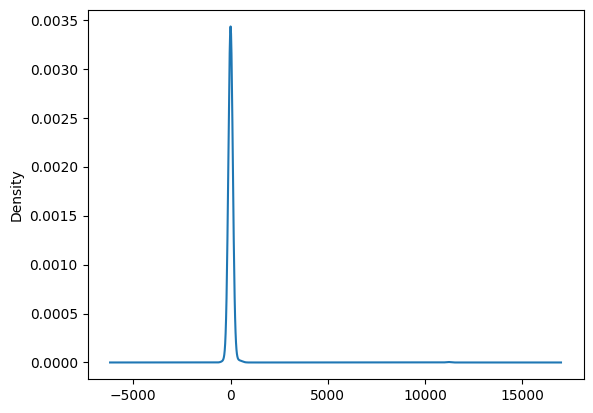

count      733.000000
mean        21.125017
std        417.174520
min       -397.067254
25%          0.000000
50%          0.000000
75%          0.000000
max      11200.000000
dtype: float64


In [13]:
from datetime import datetime
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

# Load your dataset here
dataset = read_csv('Beras RF.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)

# Select the 'Beras' column for analysis
series = dataset['Beras']

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = model_fit.resid
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

# summary stats of residuals
print(residuals.describe())


/tmp/ipykernel_1223714/2976619632.py:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = read_csv('Beras RF.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)


predicted=12455.485493, expected=12450.000000
predicted=12452.051069, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12500.000000
predicted=12467.201705, expected=12450.000000
predicted=12463.704709, expected=12450.000000
predicted=12458.235994, expected=12450.000000
predicted=12455.432528, expected=12450.000000
predicted=12453.435768, expected=12450.000000
predicted=12452.061389, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=1

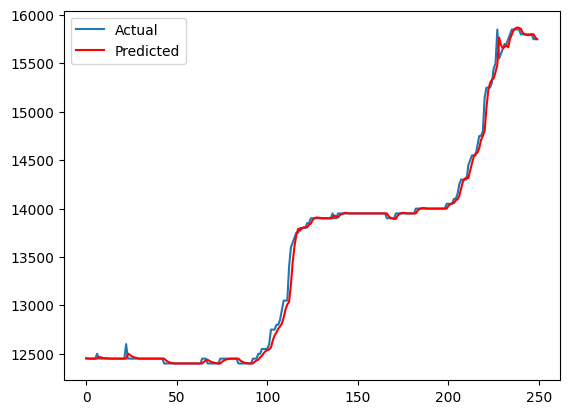

In [16]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

# Load your dataset here
dataset = read_csv('Beras RF.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)

# Select the 'Beras' column for analysis
series = dataset['Beras']

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test, label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()
